Цель: В этом задании вам предстоит научиться предсказывать судьбу животных в приюте. Найдут ли их прежние хозяева? Заберут ли их домой к новым? Или судьба будет не так благосклонна? Ответ найдём в лесу
1. Скачиваем данные вот отсюда - https://www.kaggle.com/c/shelter-animal-outcomes/data
2. Знакомимся с данными, целевой переменной будет OutcomeType, соответственно OutcomeSubType необходимо выкинуть из данных
3. Как можно заметить, почти все переменные текстовые/категориальные - смиряемся с тем, что нужно будет пилить много новых признаков
4. Делим данные на train/test, чтобы все преобразования, связанные с построением новых признаков, мы обучали только на трейне, а применяли уже везде


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./data/train.csv')

In [3]:
data.describe(include='all')

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A693053,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [4]:
data.drop(['AnimalID', 'OutcomeSubtype'], axis=1, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 8 columns):
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(8)
memory usage: 1.6+ MB


In [6]:
data.columns

Index(['Name', 'DateTime', 'OutcomeType', 'AnimalType', 'SexuponOutcome',
       'AgeuponOutcome', 'Breed', 'Color'],
      dtype='object')

#### Name

In [7]:
data['Name'].nunique()

6374

In [8]:
data['Name'].isnull().sum()

7691

#### OutcomeType

In [9]:
target = 'OutcomeType'

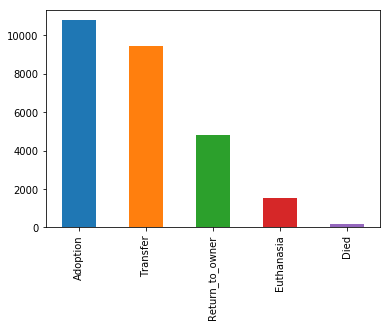

In [10]:
data[target].value_counts().plot.bar()

5. Выкидываем ID, потому что не нужОн, всё, что категориальное и с небольшим числом уникальных значений кодируем при помощи LabelEncoder (заодно можно объяснить, почему достаточно использовать LabelEncoder вместо OneHotEncoder)

In [11]:
data['OutcomeType'].value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

#### AnimalType

In [12]:
data['AnimalType'].value_counts()

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

#### SexuponOutcome

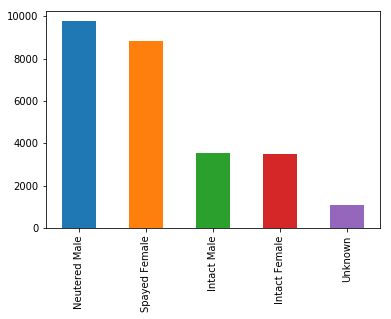

In [13]:
data['SexuponOutcome'].value_counts().plot.bar()

In [14]:
data[data['SexuponOutcome'].isnull()].index.tolist()

[3174]

In [15]:
data['SexuponOutcome'].fillna('Unknown', inplace=True)

In [16]:
data['SexuponOutcome'].isnull().sum()

0

In [17]:
def get_sex(line):
    string = str(line)
    if 'Male' in string:
        return 'male'
    if 'Female' in string:
        return 'female'
    return 'unknown'
def get_type(line):
    string = str(line)
    if 'Neutered' in string:
        return 'neutered'
    if 'Sprayed' in string:
        return 'sprayed'
    if 'Intact' in string:
        return 'intact'
    return 'unknown'
data['Sex'] = data['SexuponOutcome'].apply(get_sex)
data['Type'] = data['SexuponOutcome'].apply(get_type)
data.head()

,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Type
0,Hambone,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,male,neutered
1,Emily,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,female,unknown
2,Pearce,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,male,neutered
3,NaN,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,male,intact
4,NaN,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,male,neutered


#### Breed

In [18]:
data['Breed'].isnull().sum()

0

In [19]:
data['Breed'].nunique()

1380

In [20]:
def is_mixed_breed(line):
    string = str(line)
    if 'Mix' in string:
        return 'yes'
    return 'no'
data['Mixed'] = data['Breed'].apply(is_mixed_breed)
data.head()

,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Type,Mixed
0,Hambone,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,male,neutered,yes
1,Emily,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,female,unknown,yes
2,Pearce,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,male,neutered,yes
3,NaN,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,male,intact,yes
4,NaN,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,male,neutered,no


6. Остальные текстовые переменные, где очень много уникальных значений (вроде имени или цвета), можно закодировать по вашему вкусу, можно использовать частоту встречаемости, можно попробовать закодировать отдельные цвета LabelEncoder, и т.д.

7. Наконец, очень полезно будет на основании AgeuponOutcome создать обычную непрерывную переменную - возраст животного, а из переменной DateTime подергать отдельно год, месяц и день недели

#### AgeuponOutcome 

In [21]:
def give_age_in_years(age):
    age = str(age)
    if age == 'nan': return 0
    year = int(age.split()[0])
    if age:
        if 'year' in age: 
            return year
        if 'month' in age: 
            return year/12
        if 'week' in age: 
            return year/52
        if 'day' in age: 
            return year/365
    else: return 0

In [22]:
data['Age'] = data['AgeuponOutcome'].apply(give_age_in_years)

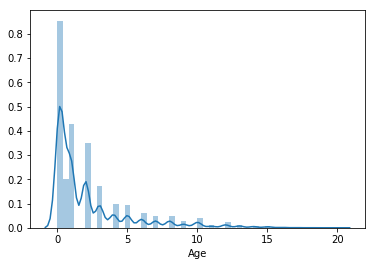

In [23]:
sns.distplot(data['Age'])

In [24]:
data.drop('AgeuponOutcome', axis=1, inplace=True)
data.head()

,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,Breed,Color,Sex,Type,Mixed,Age
0,Hambone,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,male,neutered,yes,1.000000
1,Emily,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,female,unknown,yes,1.000000
2,Pearce,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,Pit Bull Mix,Blue/White,male,neutered,yes,2.000000
3,NaN,2014-07-11 19:09:00,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,male,intact,yes,0.057692
4,NaN,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,male,neutered,no,2.000000


#### DateTime 

In [25]:
data['DateTime'] = pd.to_datetime(data['DateTime'])

In [26]:
data['Year'] = data['DateTime'].map(lambda x: x.year)
data['month'] = data['DateTime'].map(lambda x: x.month)
data['weekday'] = data['DateTime'].map(lambda x: x.dayofweek)
data.drop('DateTime', axis = 1, inplace = True)

In [27]:
data.head()

,Name,OutcomeType,AnimalType,SexuponOutcome,Breed,Color,Sex,Type,Mixed,Age,Year,month,weekday
0,Hambone,Return_to_owner,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,male,neutered,yes,1.000000,2014,2,2
1,Emily,Euthanasia,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,female,unknown,yes,1.000000,2013,10,6
2,Pearce,Adoption,Dog,Neutered Male,Pit Bull Mix,Blue/White,male,neutered,yes,2.000000,2015,1,5
3,NaN,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,male,intact,yes,0.057692,2014,7,4
4,NaN,Transfer,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,male,neutered,no,2.000000,2013,11,4


#### Color

In [28]:
data[['1Color','2Color']] = data.Color.str.split("/",expand=True,)
data.head()

,Name,OutcomeType,AnimalType,SexuponOutcome,Breed,Color,Sex,Type,Mixed,Age,Year,month,weekday,1Color,2Color
0,Hambone,Return_to_owner,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,male,neutered,yes,1.000000,2014,2,2,Brown,White
1,Emily,Euthanasia,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,female,unknown,yes,1.000000,2013,10,6,Cream Tabby,None
2,Pearce,Adoption,Dog,Neutered Male,Pit Bull Mix,Blue/White,male,neutered,yes,2.000000,2015,1,5,Blue,White
3,NaN,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,male,intact,yes,0.057692,2014,7,4,Blue Cream,None
4,NaN,Transfer,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,male,neutered,no,2.000000,2013,11,4,Tan,None


In [29]:
data['Color'].nunique()

366

In [30]:
colors = data['1Color'].value_counts()
top20_colors = colors.sort_values(ascending=False)[:20]

In [31]:
def get_color(line):
    string = str(line)
    if string in top20_colors:
        return string
    return 'other'

In [32]:
data['1Color'] = data['1Color'].apply(get_color)

In [33]:
data['2Color'].isnull().sum()

12805

In [34]:
data['2Color'].nunique()

44

In [35]:
columns_to_label = ['AnimalType', 'Sex','Type','Mixed','1Color']
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data[columns_to_label] = data[columns_to_label].apply(lambda col: labelencoder.fit_transform(col))
data.head()

,Name,OutcomeType,AnimalType,SexuponOutcome,Breed,Color,Sex,Type,Mixed,Age,Year,month,weekday,1Color,2Color
0,Hambone,Return_to_owner,1,Neutered Male,Shetland Sheepdog Mix,Brown/White,1,1,1,1.000000,2014,2,2,3,White
1,Emily,Euthanasia,0,Spayed Female,Domestic Shorthair Mix,Cream Tabby,0,2,1,1.000000,2013,10,6,9,None
2,Pearce,Adoption,1,Neutered Male,Pit Bull Mix,Blue/White,1,1,1,2.000000,2015,1,5,1,White
3,NaN,Transfer,0,Intact Male,Domestic Shorthair Mix,Blue Cream,1,0,1,0.057692,2014,7,4,20,None
4,NaN,Transfer,1,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,1,1,0,2.000000,2013,11,4,14,None


In [36]:
columns_to_drop = ['Name', 'SexuponOutcome', 'Breed', '2Color','Color']
data = data.drop(columns_to_drop, axis=1)

In [37]:
data.tail()

,OutcomeType,AnimalType,Sex,Type,Mixed,Age,Year,month,weekday,1Color
26724,Transfer,0,1,0,1,0.083333,2015,5,3,5
26725,Transfer,0,0,2,1,0.250000,2016,1,2,5
26726,Adoption,1,1,1,1,4.000000,2015,3,0,18
26727,Transfer,0,1,0,1,0.076923,2014,4,6,0
26728,Transfer,0,1,0,1,1.000000,2015,7,3,5


Запишем как LabelEncoder зашифровал признаки.
##### OutcomeType:
* 0. Adoption 
* 1. Died
* 2. Euthanasia 
* 3. Return_to_owner  
* 4. Transfer                            
##### AnimalType:
* 0. Cat 
* 1. Dog  
##### Sex
* 0. Female
* 1. Male   
* 2. None
##### Type
* 0. intact
* 1. neutered  
* 2. unknown
#### Mixed
* 0. no
* 1. yes
#### ColorType

* 0.Black            6442
* 1.Blue             1199
* 2.Blue Tabby        678
* 3.Brown            1951
* 4.Brown Brindle     699
* 5.Brown Tabby      2592
* 6.Buff              267
* 7.Calico            552
* 8.Chocolate         448
* 9.Cream Tabby       277
* 10.Gray              227
* 11.Orange Tabby     1299
* 12.Red               779
* 13.Sable             324
* 14.Tan              1674
* 15.Torbie            398
* 16.Tortie            580
* 17.Tricolor          800
* 18.White            3344
* 19.Yellow           230
* 20.Other            1989

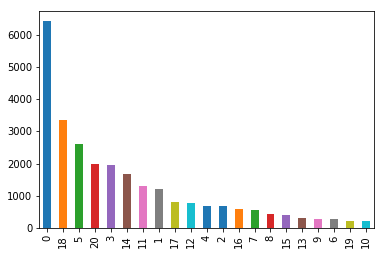

In [38]:
data['1Color'].value_counts().plot.bar()

8. Делаем бейзлайн на основании частоты встречаемости каждого класса, а затем учим лес и сравниваем качество (полезно будет смотреть на confusion_matrx и classification_report)
9. Настраиваем основные параметры леса при помощи randomsearch - n_estimators, max_depth, и еще можно class_weight
10. Визуализируем важность признаков

In [39]:
from sklearn.model_selection import train_test_split

def data_split_train_test(data, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=[target], axis=1),
    data[target],
    test_size=test_size,
    stratify=data[target],
    random_state=0)

    print("Train_shape:", X_train.shape, "Test shape:", X_test.shape)
    
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = data_split_train_test(data)

Train_shape: (18710, 9) Test shape: (8019, 9)


In [40]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [41]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 14)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 12,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    #plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 14)
    plt.xlabel('Predicted label', size = 14)

In [42]:
class_names = data['OutcomeType'].unique()

### Baseline

In [43]:
dummy_classifier = DummyClassifier(strategy="stratified")
dummy_classifier.fit(X_train, y_train);

y_pred = dummy_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

       Adoption       0.40      0.39      0.39      3231
           Died       0.00      0.00      0.00        59
     Euthanasia       0.07      0.07      0.07       466
Return_to_owner       0.18      0.18      0.18      1436
       Transfer       0.35      0.35      0.35      2827

    avg / total       0.32      0.32      0.32      8019



In [44]:
dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train, y_train);

y_pred = dummy_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

       Adoption       0.40      1.00      0.57      3231
           Died       0.00      0.00      0.00        59
     Euthanasia       0.00      0.00      0.00       466
Return_to_owner       0.00      0.00      0.00      1436
       Transfer       0.00      0.00      0.00      2827

    avg / total       0.16      0.40      0.23      8019



Confusion matrix, without normalization
[[3231    0    0    0    0]
 [  59    0    0    0    0]
 [ 466    0    0    0    0]
 [1436    0    0    0    0]
 [2827    0    0    0    0]]


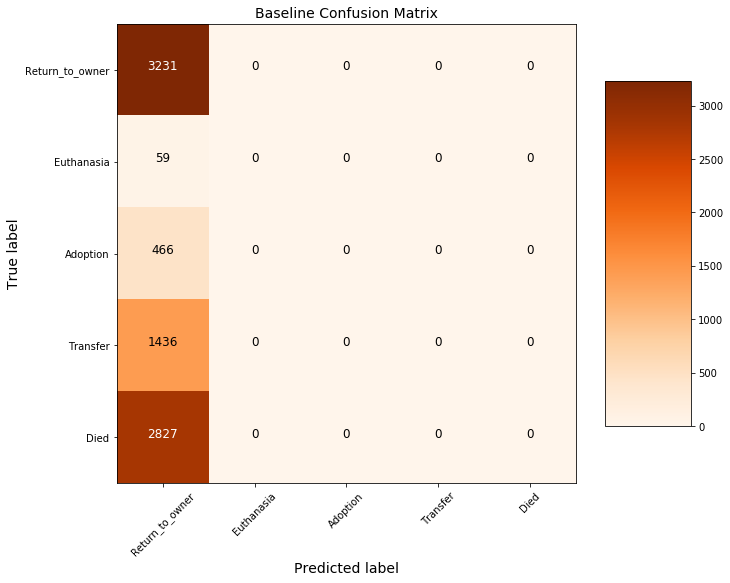

In [45]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = class_names,
                      title = 'Baseline Confusion Matrix')

#### Model: Random Forest

In [46]:
model = RandomForestClassifier(n_jobs = -1, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

       Adoption       0.66      0.75      0.70      3231
           Died       0.17      0.05      0.08        59
     Euthanasia       0.24      0.15      0.19       466
Return_to_owner       0.39      0.35      0.37      1436
       Transfer       0.67      0.65      0.66      2827

    avg / total       0.59      0.60      0.59      8019



На классе Died, Euthanasia, Return_to_owner - плохие предсказания

https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

Confusion matrix, without normalization
[[2413    2   31  410  375]
 [   7    3    3    4   42]
 [  72    4   70  118  202]
 [ 576    2   77  509  272]
 [ 610    7  108  272 1830]]


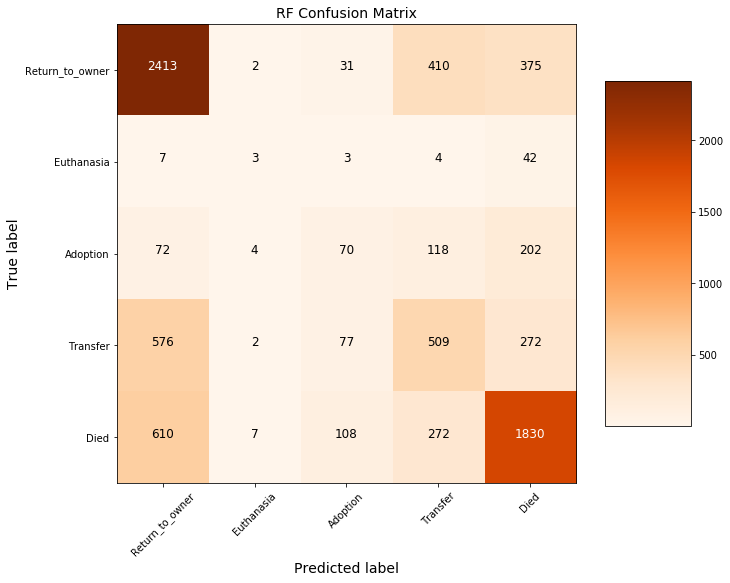

In [48]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = class_names,
                      title = 'RF Confusion Matrix')

### RF: Feature Importance

In [49]:
features = pd.Series(model.feature_importances_, index = X_train.columns).sort_values(ascending = False)
features

Age           0.251718
month         0.175662
1Color        0.153285
Type          0.138257
weekday       0.119888
Year          0.061806
Sex           0.042299
AnimalType    0.030852
Mixed         0.026233
dtype: float64

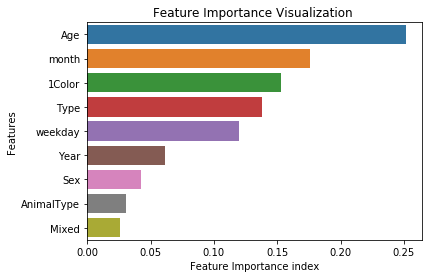

In [50]:
sns.barplot(x = features, y = features.index)

plt.xlabel('Feature Importance index')
plt.ylabel('Features')
plt.title("Feature Importance Visualization ")
plt.show();

#### Оптимизация параметров RandomSearchCV

Настраиваем основные параметры леса при помощи randomsearch - n_estimators, max_depth, и еще можно class_weight

In [51]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(criterion = 'entropy', random_state = 42, n_jobs = -1, verbose = 1)

param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'class_weight': ('balanced', 'balanced_subsample', None)
}

rs = RandomizedSearchCV(rf, param_grid, n_jobs = -1, cv = 3, n_iter = 30, verbose = 1, random_state = 42)

rs.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Done  21 out of  21 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  21 out of  21 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  21 out of  21 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  21 out of  21 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Done  87 out of  87 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  87 out of  87 | elapsed:    0.

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=1, warm_start=False),
          fit_params=None, iid=True, n_iter=30, n_jobs=-1,
          param_distributions={'n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, ..., 16, 17, 17, 17, 18, 18, 18, 19, 19, 20], 'class_weight': ('balanced', 'balanced_subsample', None)},
          pre_dispatch='2*n_jobs', random_state=

In [52]:
rs.best_params_

{'class_weight': None, 'max_depth': 10, 'n_estimators': 130}

In [53]:
best_model = rs.best_estimator_

In [54]:
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 130 out of 130 | elapsed:    0.1s finished


                 precision    recall  f1-score   support

       Adoption       0.66      0.83      0.74      3231
           Died       0.00      0.00      0.00        59
     Euthanasia       0.46      0.02      0.04       466
Return_to_owner       0.46      0.39      0.42      1436
       Transfer       0.71      0.69      0.70      2827

    avg / total       0.62      0.65      0.62      8019



Confusion matrix, without normalization
[[2678    0    1  317  235]
 [   6    0    0    4   49]
 [  78    0   11  110  267]
 [ 627    0    6  554  249]
 [ 652    0    6  230 1939]]


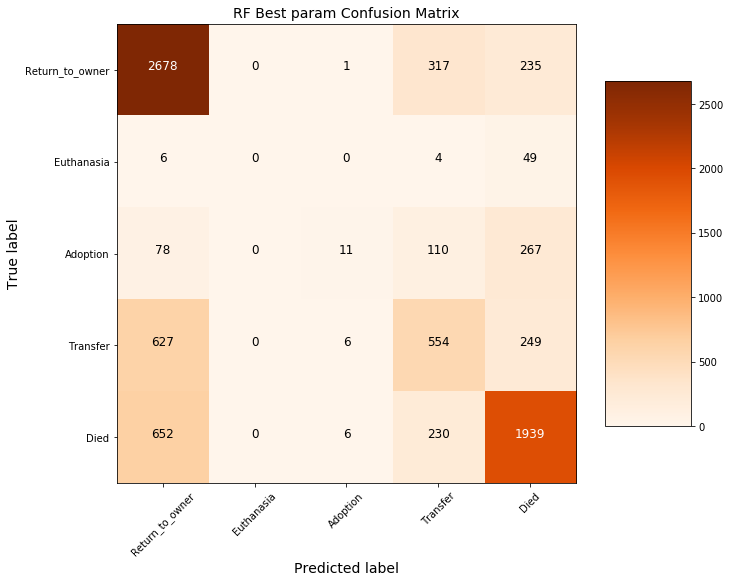

In [55]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plot_confusion_matrix(cm, classes = class_names,
                      title = 'RF Best param Confusion Matrix')

In [56]:
best_features = pd.Series(best_model.feature_importances_, index = X_train.columns).sort_values(ascending = False)


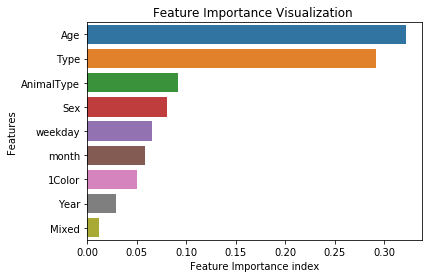

In [57]:
sns.barplot(x = best_features, y = best_features.index)

plt.xlabel('Feature Importance index')
plt.ylabel('Features')
plt.title("Feature Importance Visualization ")
plt.show()

Лучшие признаки предсказывания -  Age, Тип (Intact/Sprayed/Neutered),AnimalType (Dog/Cat), Sex (Female/Male